## RNN의 문제점
- RNN은 장기 의존성 문제로 성능이 좋지 못함 -> gate를 통해 해결
 - gate = 문 = 데이터의 흐름을 제어

[2.65942893 0.61006697 0.17776304]


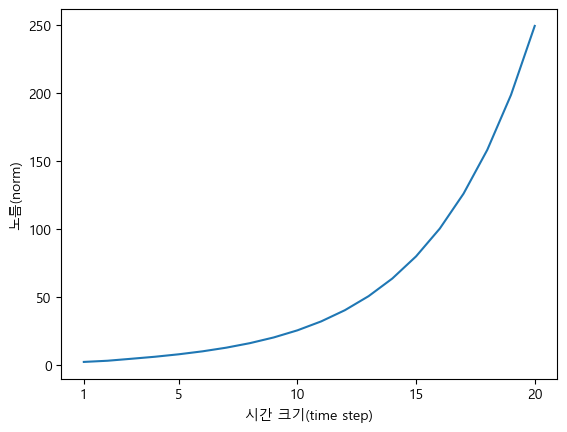

In [1]:
# 기울기 크기 변화 실험

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

N = 2 #미니배치 크기
H = 3 #은닉 상태 벡터의 차원 수
T = 20 #시계열 데이터의 길이

dh = np.ones((N,H)) #dh = 기울기 / ones는 zeros와 마찬가지로 1로 가득찬 array를 생성
np.random.seed(3) # 재현 할 수 있도록 난수의 시드 고정
Wh = np.random.randn(H,H) # .randn(n,m) : n*m 표준정규분포 난수 행렬 생성

norm_list = []
for t in range(T):
    dh = np.matmul(dh, Wh.T) # 행렬곱
    norm = np.sqrt(np.sum(dh**2)) / N # 평균 L2노름(각각의 원소를 제곱해 모두 더한 후 제곱근 취한 값)
    norm_list.append(norm)

u, s, vh = np.linalg.svd(Wh)
print(s)

# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

# 결과 : 기울기 폭발(시간에 비례해 지수적으로 증가)

- SVD(특이값 분해)

    np.linalg.svd(Wh)는 넘파이(Numpy) 라이브러리를 사용하여 행렬 Wh의 특이값 분해(Singular Value Decomposition, SVD)를 수행하는 코드입니다. 여기서 Wh는 분해하고자 하는 행렬입니다. 특이값 분해는 행렬을 특정한 구조로 분해하는 한 방법으로, 어떤 행렬이든지 세 개의 행렬의 곱으로 표현할 수 있음을 의미합니다.

    u, s, vh = np.linalg.svd(Wh)에서 반환되는 값들은 다음과 같습니다:

    - u: 왼쪽 특이벡터를 열로 하는 행렬(U). Wh 행렬의 왼쪽에서 곱해지며, Wh의 모든 열 벡터들을 선형 조합하여 나타낼 수 있는 기저 벡터들을 포함합니다.
    - s: 특이값을 담고 있는 배열. 이 배열은 Wh 행렬의 특이값들을 내림차순으로 정렬한 것입니다. 일반적으로 이 배열은 대각행렬의 대각선에 위치한 값들로 구성되지만, np.linalg.svd 함수는 효율성을 위해 대각행렬이 아닌 1차원 배열로 특이값들을 반환합니다.
    - vh: 오른쪽 특이벡터의 전치 행렬(V*). Wh 행렬의 오른쪽에서 곱해지며, Wh의 모든 행 벡터들을 선형 조합하여 나타낼 수 있는 기저 벡터들을 포함합니다. 여기서 V*는 V의 켤레 전치를 의미합니다.
    
    특이값 분해는 선형대수, 통계, 컴퓨터 과학 등 여러 분야에서 중요한 도구로 사용됩니다. 예를 들어, 데이터의 차원 축소, 이미지 압축, 노이즈 제거, 추천 시스템 등에 활용됩니다. SVD를 통해 얻은 특이값들은 행렬의 성질을 이해하는 데 중요한 정보를 제공하며, 행렬의 랭크(rank)를 결정하고, 최소 제곱 문제의 해를 구하는 데에도 사용될 수 있습니다.

[1.32971447 0.30503349 0.08888152]


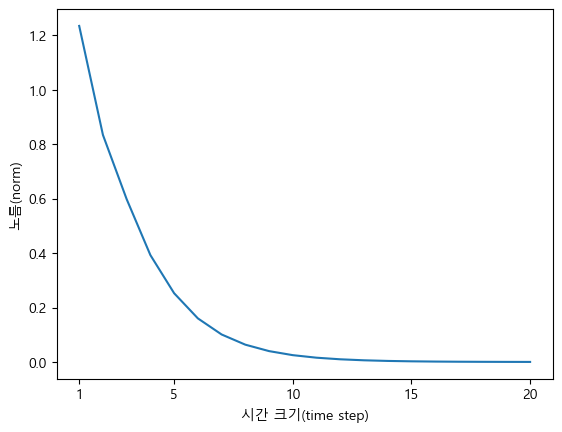

In [2]:
# Wh의 초기값 변경(이전 값에 0.5배) 후 재실험

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

N = 2 #미니배치 크기
H = 3 #은닉 상태 벡터의 차원 수
T = 20 #시계열 데이터의 길이

dh = np.ones((N,H)) #dh = 기울기 / ones는 zeros와 마찬가지로 1로 가득찬 array를 생성
np.random.seed(3) # 재현 할 수 있도록 난수의 시드 고정
Wh = np.random.randn(H,H)*0.5 # .randn(n,m) : n*m 표준정규분포 난수 행렬 생성

norm_list = []
for t in range(T):
    dh = np.matmul(dh, Wh.T) # 행렬곱
    norm = np.sqrt(np.sum(dh**2)) / N # 평균 L2노름(각각의 원소를 제곱해 모두 더한 후 제곱근 취한 값)
    norm_list.append(norm)

u, s, vh = np.linalg.svd(Wh)
print(s)

# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

# 결과 : 기울기 소실(기울기가 지수적으로 감소-> 일정 수준 이하로 작아지면 가중치 매개변수가 더이상 갱신되지 않으므로, 장기 의존 관계 학습 불가)

- 기울기 폭발 대책 : 기울기 클리핑(gradients clipping = 기울기 자르기)
    - 학습 중에 발생하는 업데이트의 크기가 너무 커져서 모델의 학습이 불안정해지는 문제 방지

In [3]:
import numpy as np

dW1 = np.random.rand(3,3)*10 # 0과 1 사이의 균일 분포에서 추출한 난수에 10을 곱하여 초기화
dW2 = np.random.rand(3,3)*10
grads = [dW1, dW2]
max_nrom = 5.0

def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads :
        total_norm += np.sum(grad**2) #제곱의 합
    total_norm = np.sqrt(total_norm) #제곱의 합에 제곱근을 취하여 총 노름 구하기

    rate = max_norm / (total_norm + 1e-6) #1e-6을 더하는 이유는 총 노름이 0에 매우 가까울 때 발생할 수 있는 나눗셈 에러를 방지하기 위함
    if rate < 1: #만약 rate가 1보다 작다면, 즉 총 노름(total_norm = 분모)이 설정한 최대 노름(분자)보다 크다면 그래디언트를 클리핑
        for grad in grads:
            grad *= rate #각 그래디언트의 크기를 비율만큼 줄여, 총 노름이 최대 노름을 넘지 않도록 조정


## LSTM(Long Short - Term Memory) : 단기 기억을 긴 시간 지속 가능
- RNN과 달리 c(memory cell)이라는 기억셀 경로가 있다는 차이점
- 기억셀 경로는 데이터를 자기 자신으로만(LSTM 계층 내에서만) 주고 받음 = 즉, LSTM 계층 내에서만 완결되고, 다른 계층으로는 출력되지 않음
- LSTM에서 사용하는 gate는 열기/닫기 뿐만 아니라 '어느 정도' 열지를 조절 가능 -> '정도' 역시 데이터(전용 가중치 매개변수)를 통해 학습 가능
- 행렬곱이 아닌 원소별 곱(아마다르 곱)을 통해 곱셈의 효과가 누적되지 않아 기울기 소실 방지 가능(참고 - https://chonchony.tistory.com/46)

In [5]:
#LSTM 구현

import sys
sys.path.append('..')
import numpy as np
from common.functions import sigmoid

class LSTM:
    def __init__(self, Wx, Wh, b): #초기화
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None # 순전파 때 중간 결과를 보관했다가 역전파 계산에 사용하려는 용도의 인스턴스 변수
    
    def forward(self, x, h_prev, c_prev): #h_prev = 이전 시각의 은닉 상태 / c_prev = 이전 시각의 기억셀
        Wx, Wh, b =self.params
        N, H = h_prev.shape

        A = np.matmul(x, Wx) + np.matmul(h_prev, Wh) + b

        #slice
        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H: ]

        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)

        c_next = f * c_prev + g*i
        h_next = o * np.tanh(c_next)

        self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
        return h_next, c_next


In [6]:
#Time LSTM 구현(T개분의 시계열 데이터를 한번에 처리)

class TimeLSTM:
    def __init__(self, Wx, Wh, b, stateful=False): #초기화
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None
        self.h, self.c = None, None
        self.dh = None
        self.stateful = stateful #상태 유지여부 지정
    
    def forward(self, xs): #h_prev = 이전 시각의 은닉 상태 / c_prev = 이전 시각의 기억셀
        Wx, Wh, b =self.params
        N, T, D = xs.shape # N은 배치 크기, T는 시퀀스 길이, D는 입력 데이터의 차원
        H = Wh.shape[0]

        self.layers=[]
        hs = np.empty((N, T, H), dtype='f') #실수 

        if not self.stateful or self.h is None:
            self.h = np.zeros((N,H), dtype='f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N,H), dtype='f')

        for t in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h

            self.layers.append(layer)
        
        return hs
    
    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape # N은 배치 크기, T는 시퀀스 길이, H는 은닉 상태의 차원
        D = Wx.shape[0]

        dxs = np.empty((N,T,D), dtype='f')
        dh, dc = 0,0

        grads = [0,0,0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
            self.dh = dh
            return dxs
        
    def set_state(self, h, c=None):
        self.h, self.c = h,c
    
    def reset_state(self):
        self.h, self.c = None, None


| 에폭 1 |  반복 1 / 1327 | 시간 0[s] | 퍼플렉서티 9999.05
| 에폭 1 |  반복 21 / 1327 | 시간 2[s] | 퍼플렉서티 3091.23
| 에폭 1 |  반복 41 / 1327 | 시간 5[s] | 퍼플렉서티 1271.13
| 에폭 1 |  반복 61 / 1327 | 시간 8[s] | 퍼플렉서티 980.61
| 에폭 1 |  반복 81 / 1327 | 시간 11[s] | 퍼플렉서티 839.58
| 에폭 1 |  반복 101 / 1327 | 시간 13[s] | 퍼플렉서티 658.51
| 에폭 1 |  반복 121 / 1327 | 시간 16[s] | 퍼플렉서티 677.20
| 에폭 1 |  반복 141 / 1327 | 시간 19[s] | 퍼플렉서티 608.86
| 에폭 1 |  반복 161 / 1327 | 시간 22[s] | 퍼플렉서티 599.11
| 에폭 1 |  반복 181 / 1327 | 시간 24[s] | 퍼플렉서티 591.17
| 에폭 1 |  반복 201 / 1327 | 시간 27[s] | 퍼플렉서티 506.11
| 에폭 1 |  반복 221 / 1327 | 시간 30[s] | 퍼플렉서티 490.80
| 에폭 1 |  반복 241 / 1327 | 시간 32[s] | 퍼플렉서티 456.37
| 에폭 1 |  반복 261 / 1327 | 시간 35[s] | 퍼플렉서티 473.74
| 에폭 1 |  반복 281 / 1327 | 시간 37[s] | 퍼플렉서티 476.47
| 에폭 1 |  반복 301 / 1327 | 시간 40[s] | 퍼플렉서티 398.17
| 에폭 1 |  반복 321 / 1327 | 시간 43[s] | 퍼플렉서티 349.69
| 에폭 1 |  반복 341 / 1327 | 시간 46[s] | 퍼플렉서티 410.02
| 에폭 1 |  반복 361 / 1327 | 시간 48[s] | 퍼플렉서티 424.49
| 에폭 1 |  반복 381 / 1327 | 시간 51[s] | 퍼플렉서티 340.49
| 에폭 1 

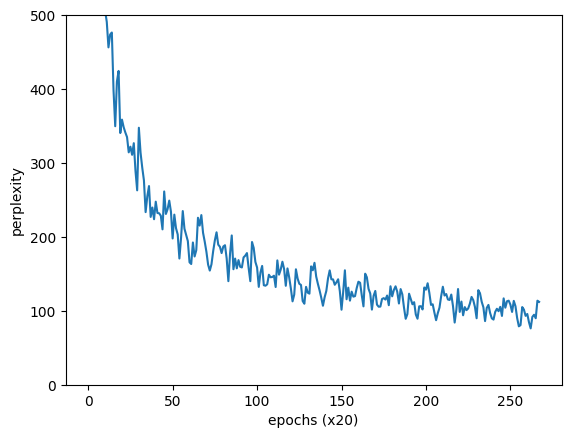

퍼플렉서티 평가 중 ...
234 / 235
test perplexity :  135.52834136653846


In [2]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from rnnlm import Rnnlm

#하이퍼파라미터 설정

batch_size = 20
wordvec_size = 100
hidden_size = 100 #RNN의 은닉 상태 벡터의 원소 수
time_size = 35 #RNN을 펼치는 크기
lr = 20.0 #learning rate(학습률)
max_epoch = 4
max_grad = 0.25

#학습 데이터 읽기

corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1] #마지막 요소를 제외한 모든 요소를 포함
ts = corpus[1:]

#모델 생성
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

#기울기 클리핑을 적용하여 학습
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad, eval_interval=20)
trainer.plot(ylim=(0,500))

#테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('test perplexity : ', ppl_test)

#매개변수 저장
model.save_params()


### 개선된 LSTM

[개선 사항]
1. LSTM 계층의 다층화(2개 층)
2. 드롭아웃 사용(과적합 방지를 위한 정규화 방법, 깊이 방향으로만 적용 - 시간 방향으로 작동할 경우 손실 우려)
3. 가중치 공유(Embedding 계층과 Affine 계층에서 가중치 공유 -> 학습해야하는 매개변수 수를 줄여서 학습이 쉬워지고, 과적합 억제 혜택)

In [ ]:
#CPU(2일), GPU(5시간) 소요 예정 -> 이미 학습된 가중치를 활용하여 진행

import sys
sys.path.append('..')
from common import config
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from better_rnnlm import BetterRnnlm

#하이퍼파라미터 설정

batch_size = 20
wordvec_size = 650
hidden_size = 650 #RNN의 은닉 상태 벡터의 원소 수
time_size = 35 #RNN을 펼치는 크기
lr = 20.0 #learning rate(학습률)
max_epoch = 40
max_grad = 0.25
dropout = 0.5

#학습 데이터 읽기

corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_val, _, _ = ptb.load_data('val')
corpus_test, _, _ = ptb.load_data('test')

vocab_size = len(word_to_id)
xs = corpus[:-1] #마지막 요소를 제외한 모든 요소를 포함
ts = corpus[1:]

#모델 생성
model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

best_ppl = float('inf') # 초기값을 float('inf')로 설정하여 모든 실제 값이 이 값보다 작도록 합니다.
for epoch in range(max_epoch):
    trainer.fit(xs, ts, max_epoch=1, batch_size=batch_size, time_size=time_size, max_grad=max_grad)

    model.reset_state()
    ppl = eval_perplexity(model, corpus_val)
    print('검증 perpelexity : ', ppl)

    if best_ppl > ppl : #최고 perplexity 갱신: 현재 perplexity가 best_ppl보다 낮으면 best_ppl을 갱신하고 모델의 파라미터를 저장 (model.save_params()).
        best_ppl = ppl
        model.save_params()
    
    else :
        lr /=4.0 # 만약 현재 perplexity가 이전 최고 perplexity보다 크면, 학습률을 4로 나누어 학습률 감소시킴 (lr /= 4.0).
        optimizer.lr = lr
    
    model.reset_state()
    print('-'*50)

### 이미 학습된 가중치 적용

In [2]:


import sys
sys.path.append('..')
from common import config
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from better_rnnlm import BetterRnnlm

#하이퍼파라미터 설정

batch_size = 20
wordvec_size = 650
hidden_size = 650 #RNN의 은닉 상태 벡터의 원소 수
time_size = 35 #RNN을 펼치는 크기
lr = 20.0 #learning rate(학습률)
max_epoch = 40
max_grad = 0.25
dropout = 0.5

#학습 데이터 읽기

corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_val, _, _ = ptb.load_data('val')
corpus_test, _, _ = ptb.load_data('test')

vocab_size = len(word_to_id)
xs = corpus[:-1] #마지막 요소를 제외한 모든 요소를 포함
ts = corpus[1:]

#모델 생성
model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
model.load_params('../ch06/BetterRnnlm.pkl') #이미 학습된 가중치 적용
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

best_ppl = float('inf') # 초기값을 float('inf')로 설정하여 모든 실제 값이 이 값보다 작도록 합니다.
for epoch in range(max_epoch):
    trainer.fit(xs, ts, max_epoch=1, batch_size=batch_size, time_size=time_size, max_grad=max_grad)

    model.reset_state()
    ppl = eval_perplexity(model, corpus_val)
    print('검증 perpelexity : ', ppl)

    if best_ppl > ppl : #최고 perplexity 갱신: 현재 perplexity가 best_ppl보다 낮으면 best_ppl을 갱신하고 모델의 파라미터를 저장 (model.save_params()).
        best_ppl = ppl
        model.save_params()
    
    else :
        lr /=4.0 # 만약 현재 perplexity가 이전 최고 perplexity보다 크면, 학습률을 4로 나누어 학습률 감소시킴 (lr /= 4.0).
        optimizer.lr = lr
    
    model.reset_state()
    print('-'*50)

    #결과 해석
    ## 개선되기 전 퍼플렉서티는 112 -> 개선 후 

| 에폭 1 |  반복 1 / 1327 | 시간 1[s] | 퍼플렉서티 230.61
| 에폭 1 |  반복 21 / 1327 | 시간 30[s] | 퍼플렉서티 138.37
| 에폭 1 |  반복 41 / 1327 | 시간 59[s] | 퍼플렉서티 128.80
| 에폭 1 |  반복 61 / 1327 | 시간 88[s] | 퍼플렉서티 121.25
| 에폭 1 |  반복 81 / 1327 | 시간 117[s] | 퍼플렉서티 106.52
| 에폭 1 |  반복 101 / 1327 | 시간 146[s] | 퍼플렉서티 101.73
| 에폭 1 |  반복 121 / 1327 | 시간 175[s] | 퍼플렉서티 112.96
| 에폭 1 |  반복 141 / 1327 | 시간 202[s] | 퍼플렉서티 124.34
| 에폭 1 |  반복 161 / 1327 | 시간 228[s] | 퍼플렉서티 138.88
| 에폭 1 |  반복 181 / 1327 | 시간 254[s] | 퍼플렉서티 147.22
| 에폭 1 |  반복 201 / 1327 | 시간 281[s] | 퍼플렉서티 140.25
| 에폭 1 |  반복 221 / 1327 | 시간 307[s] | 퍼플렉서티 136.18
| 에폭 1 |  반복 241 / 1327 | 시간 333[s] | 퍼플렉서티 130.45
| 에폭 1 |  반복 261 / 1327 | 시간 359[s] | 퍼플렉서티 139.72
| 에폭 1 |  반복 281 / 1327 | 시간 386[s] | 퍼플렉서티 136.17
| 에폭 1 |  반복 301 / 1327 | 시간 412[s] | 퍼플렉서티 117.43
| 에폭 1 |  반복 321 / 1327 | 시간 438[s] | 퍼플렉서티 93.12
| 에폭 1 |  반복 341 / 1327 | 시간 464[s] | 퍼플렉서티 129.15
| 에폭 1 |  반복 361 / 1327 | 시간 490[s] | 퍼플렉서티 140.98
| 에폭 1 |  반복 381 / 1327 | 시간 515[s] | 퍼플렉서티

KeyboardInterrupt: 